# Data wrangling

Python for Analytics - class project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
#this is the template for the final project
#the dataset you will be using is a "teams" dataset
#it is a complete set of data for major league baseball
#Don't worry, knowledge of baseball is not needed.  

In [3]:
#This project will put to use the python skills that you have developed during the semester
#you will be doing an analysis of this data

In [4]:
#important: remember to show all code and visualizations

In [5]:
df = pd.read_excel("Teams9650.xlsx").dropna(how = "all")
df

,yearID,lgID,teamID,franchID,Rank,G,Ghome,W,L,DivWin,...,ERA,CG,SV,E,DP,FP,attendance,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,3,31,NaN,20.0,10,NaN,...,3.55,22,3,243,24,0.834,NaN,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,2,28,NaN,19.0,9,NaN,...,2.76,25,1,229,16,0.829,NaN,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,8,29,NaN,10.0,19,NaN,...,4.11,23,0,234,15,0.818,NaN,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,7,19,NaN,7.0,12,NaN,...,5.17,19,0,163,8,0.803,NaN,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,5,33,NaN,16.0,17,NaN,...,3.72,32,0,235,14,0.840,NaN,NYU,NY2,NY2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2950,2020,NL,SLN,STL,3,58,27.0,30.0,28,N,...,3.90,2,13,33,46,0.983,0.0,STL,SLN,SLN
2951,2020,AL,TBA,TBD,1,60,29.0,40.0,20,Y,...,3.56,0,23,33,52,0.985,0.0,TBR,TBA,TBA
2952,2020,AL,TEX,TEX,5,60,30.0,22.0,38,N,...,5.02,2,10,40,40,0.981,0.0,TEX,TEX,TEX
2953,2020,AL,TOR,TOR,3,60,26.0,32.0,28,N,...,4.60,0,17,38,47,0.982,0.0,TOR,TOR,TOR


In [6]:
#1 which team has the most world series wins?  Show a list of teams in order of world series victories
#WSWin field (Y/N)

WS_winners = df.loc[df["WSWin"] == "Y"]
WS_wins = WS_winners.groupby(["teamID"], as_index = False)["WSWin"].count()

#teams in order of world series victories:
WS_wins = WS_wins.sort_values(by = ["WSWin"],ascending = False).reset_index(drop = True)
WS_wins

,teamID,WSWin
0,NYA,27
1,SLN,11
2,BOS,9
3,NY1,7
4,LAN,6
5,CIN,5
6,PIT,5
7,PHA,5
8,DET,4
9,OAK,4


#### A: New York Yankees have the most (27) world series wins.

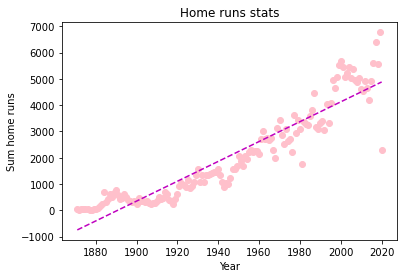

In [7]:
#2 #what is the trend of home runs over the years? has it gone up? 
#stayed the same? show a visualization

home_runs = df.groupby(["yearID"], as_index = False)["HR"].sum()
home_runs.columns

x = home_runs["yearID"]
y = home_runs["HR"]

plt.scatter(x, y, c = "Pink")
plt.title("Home runs stats")
plt.xlabel("Year")
plt.ylabel("Sum home runs")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"m--")
plt.show()

#### A: The trend indicates that home runs stats are going up.

In [8]:
#3 winning percentage (1/5)
#add a winning percentage column (W/W+l) 

#adds a new column with a derived value
df["Win_percentage"] = df["W"] / (df["W"] + df["L"])

#to make data more readable new column is added after values it's derived from
cols = list(df.columns)
df = df[cols[0:9] + [cols[-1]] + cols[9:]]
df = df.iloc[:, : -1]
df.columns

Index(['yearID', 'lgID', 'teamID', 'franchID', 'Rank', 'G', 'Ghome', 'W', 'L',
       'Win_percentage', 'DivWin', 'WCWin', 'LgWin', 'WSWin', 'R', 'AB', 'H',
       '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'CS', 'HBP', 'SF', 'RA', 'ER',
       'ERA', 'CG', 'SV', 'E', 'DP', 'FP', 'attendance', 'teamIDBR',
       'teamIDlahman45', 'teamIDretro'],
      dtype='object')

In [9]:
#3 winning percentage cd. (2/5)
#which team is the ovarall worst team/year in baseball history?(lowest winning pct)

worst_percentage = df["Win_percentage"].min()

worst_team = df.loc[df["Win_percentage"] == worst_percentage].reset_index()
worst_team[["teamID", "yearID", "Win_percentage"]]
#worst_team.index = ["Worst","Worst"]
#worst_team

,teamID,yearID,Win_percentage
0,WS4,1872,0.0
1,BL4,1873,0.0


In [10]:
#3 winning percentage cd. (3/5)
#which team is the ovarall best team/year in baseball history?(highest winning pct)

best_percentage = df["Win_percentage"].max()

best_team = df.loc[df["Win_percentage"] == best_percentage].reset_index()
best_team[["teamID", "yearID", "Win_percentage"]]

,teamID,yearID,Win_percentage
0,BS1,1875,0.898734


In [11]:
#3 winning percentage cd. (4/5)
#show the list of teams in ascending and descending order

#ASCENDING:
df_a = df.sort_values(by = ["Win_percentage"])
df_a.head()

,yearID,lgID,teamID,franchID,Rank,G,Ghome,W,L,Win_percentage,...,ERA,CG,SV,E,DP,FP,attendance,teamIDBR,teamIDlahman45,teamIDretro
21,1873,NaN,BL4,MAR,9,6,NaN,0.0,6,0.000000,...,8.00,6,0,74,0,0.761,NaN,MAR,BL4,BL4
19,1872,NaN,WS4,NAT,11,11,NaN,0.0,11,0.000000,...,6.18,11,0,120,2,0.774,NaN,NAT,WS4,WS4
37,1875,NaN,BR2,BRA,11,44,NaN,2.0,42,0.045455,...,3.16,31,0,432,20,0.801,NaN,BRA,BR2,BR2
41,1875,NaN,KEO,WES,13,13,NaN,1.0,12,0.076923,...,1.83,13,0,78,5,0.860,NaN,WES,KEO,KEO
24,1873,NaN,ELI,RES,8,23,NaN,2.0,21,0.086957,...,3.26,22,0,244,14,0.789,NaN,RES,ELI,ELI


In [12]:
#DESCENDING
df_d = df.sort_values(by = ["Win_percentage"], ascending = False)
df_d.head()

,yearID,lgID,teamID,franchID,Rank,G,Ghome,W,L,Win_percentage,...,ERA,CG,SV,E,DP,FP,attendance,teamIDBR,teamIDlahman45,teamIDretro
38,1875,NaN,BS1,BNA,1,82,NaN,71.0,8,0.898734,...,1.87,60,17,483,56,0.870,NaN,BOS,BS1,BS1
151,1884,UA,SLU,SLM,1,113,NaN,94.0,19,0.831858,...,1.96,104,6,554,79,0.888,NaN,SLM,SLU,SLU
12,1872,NaN,BS1,BNA,1,48,NaN,39.0,8,0.829787,...,1.86,41,4,280,44,0.875,NaN,BOS,BS1,BS1
80,1880,NL,CHN,CHC,1,86,NaN,67.0,17,0.797619,...,1.93,80,3,329,41,0.913,NaN,CHC,CHN,CHN
51,1876,NL,CHN,CHC,1,66,NaN,52.0,14,0.787879,...,1.76,58,4,282,33,0.899,NaN,CHC,CHN,CHN


In [13]:
#3 winning percentage cd. (5/5)
#add a column that holds a 1 if the team won the world series and 0 if not (this will be used later
#on)

df["Champ"] = np.where(df["WSWin"] == "Y", 1, 0)

#to make data more readable new column is added after value it's derived from
cols=list(df.columns)
df = df[cols[:14] + [cols[-1]] + cols[14:]]
df = df.iloc[:, : -1]
df.columns

Index(['yearID', 'lgID', 'teamID', 'franchID', 'Rank', 'G', 'Ghome', 'W', 'L',
       'Win_percentage', 'DivWin', 'WCWin', 'LgWin', 'WSWin', 'Champ', 'R',
       'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'CS', 'HBP', 'SF', 'RA',
       'ER', 'ERA', 'CG', 'SV', 'E', 'DP', 'FP', 'attendance', 'teamIDBR',
       'teamIDlahman45', 'teamIDretro'],
      dtype='object')

In [14]:
#4 correlation
#which features correlate to whether a team has won the world series or not
#pick the features that have the highest correlations with the binary champ column. use a loop
#to determine this

corr_data = df.corr()["Champ"]
corr_data

#code creates a list of abs correlations equal and greater than 0.2 (weak linear correlation)
corr_coeff= list()
for k,v in corr_data.items():
    if abs(v) >= 0.2 and k not in ["Champ"]:
        corr_coeff.append((k,v))       
corr_coeff

[('Rank', -0.2682086178323467),
 ('W', 0.24618395731542683),
 ('Win_percentage', 0.27232343063217707)]

#### A: It seems that overall win/success statistics determine whether a team will be successfull in the world series.
i.e. if a team is good it has better chances of being a champion in the world series. Also, as the rank increases (the team is doing worse) this causes a champion variable to decrease.

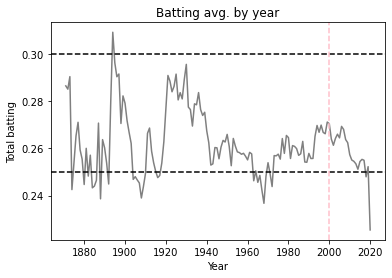

In [15]:
#5 overall trend of batting average
#what is the overall trend in team batting average by year? show a visualization and describe 
#the result in words

team_h = df.groupby(["yearID"], as_index = False)["H"].sum()
team_ab = df.groupby(["yearID"], as_index = False)["AB"].sum()
year = team_h["yearID"]

data = [team_h, team_ab]
data

n_df = pd.concat(data, axis=1).T.drop_duplicates().T
n_df["team_bat_avg"] = n_df["H"]/n_df["AB"]
n_df

x = n_df["yearID"]
y = n_df["team_bat_avg"]

plt.plot(x, y, c = "Grey")
plt.title("Batting avg. by year")
plt.xlabel("Year")
plt.ylabel("Total batting")
plt.axhline(y=0.25, color='k', linestyle='--')
plt.axhline(y=0.3, color='k', linestyle='--')
plt.axvline(2000, color = "Pink", linestyle = "--")

#### A: It seems that thedata for batting average mostly oscilates between 0.25 and 0.3. As of 2000 the metric is in a negative trend.

In [11]:
#6 missing data
#pick 3 columns that have missing data.  decide which of the three strategies to use and implement

#delete the missing rows
#delete the entire column
#fill the columns with a value 

df.info()

NameError: name 'df' is not defined

#### A: Columns that need a fix:
lgID, DivWin, WCWin, LgWin, WSWin, SO, SB, CS, HBP, SF, attendance 

In [17]:
df.std(numeric_only = True)

yearID                42.749138
Rank                   2.299259
G                     24.520637
Ghome                  6.971355
W                     18.009898
L                     17.772812
Win_percentage         0.094831
Champ                  0.198202
R                    139.966580
AB                   800.396007
H                    231.566547
2B                    59.977319
3B                    22.473207
HR                    63.873978
BB                   133.439539
SO                   314.078401
SB                    69.958499
CS                    21.878398
HBP                   17.878284
SF                    10.209795
RA                   139.517459
ER                   150.044937
ERA                    0.783444
CG                    39.240576
SV                    16.309422
E                    108.505665
DP                    36.044639
FP                     0.029159
attendance        966227.900013
dtype: float64

In [18]:
n_df = df._get_numeric_data()
cv = lambda x: np.std(x, ddof = 1) / np.mean(x) * 100 
cv(n_df)

yearID              2.183047
Rank               56.770632
G                  16.359640
Ghome               8.935976
W                  24.155480
L                  23.841232
Win_percentage     19.028336
Champ             484.039423
R                  20.568304
AB                 15.608465
H                  17.282243
2B                 26.267789
3B                 48.944486
HR                 60.799821
BB                 28.195035
SO                 41.559862
SB                 63.722521
CS                 46.676085
HBP                39.370214
SF                 23.081651
RA                 20.502336
ER                 26.213131
ERA                20.404212
CG                 81.732185
SV                 67.209157
E                  59.706535
DP                 27.168771
FP                  3.018040
attendance         70.265931
dtype: float64

#### A: After analysis of the data on hand I would refrain from deleting missing rows in problematic columns, as we would lose the data for the entire years in some cases and records for other columns, which are in fact populated. I would also refrain from filling in the missing data with mode/median value as the data is quite dispersed as proven by above std and cv metrics. If the data was less dispersed I would employ this method for SB (Stolen Base, missing 4% of data) and SO (Strikeouts by batters, missing ~1% of data), however with this level of dispersion I find it quite risky. Thus, I would drop the columns which are missing over 50% of the data.

WCWin (Wild card winner) column has only 774 records, DivWin (Division winner) 1410 and SF (Sacrifice flies) 1414.
The practice employed by statisticians involves dropping the column when 25 - 30% of data is missing. We have over 50% of the data missing. Moreover, both WCWin and DivWin are a categorical fields (Y/N), so using mode/median to fill in the blanks would not work very well. In case of SF we would have to fill over 50% of the data with one mode/median knowing that the data we have is very dispersed.

#### The fix:

In [19]:
df_fixed = df.drop(columns = ["WCWin", "DivWin", "SF"])

In [1]:
#7 outliers (1/2)
#determine 3 columns that have outliers and correct the situation

cols = list(df_fixed.columns)
cols = cols[5:35]
cols

#Part 1.
#function detects outliers, returns dictionary of column name where outliers were found and the count of outliers found, arguments: 
#lst = list on column names & num = we want more than num outliers, default value 100 returns 3 columns ["G", "Champ", "AB"].
def detect_outliers(lst, num = None):
    
    if num == None:
        num = 100
    
    cols_with_outliers = dict()
    max_cols_with_outliers = dict()
    
    for column in lst:
        k = column
        v = 0
        for record in df[column]:
            try:
                mean = df[column].mean()
                st_dev = df[column].std()
                #we are interested only in numerical data:
                record = float(record)
                #print(column, record, mean)
                if abs(record - mean) > (3 * st_dev):
                    #print("Outlier found in column", column)
                    cols_with_outliers[k] = cols_with_outliers.get(k,0)+1
            except:
                continue

    for k,v in cols_with_outliers.items():
        if v > num:
            max_cols_with_outliers[k] = v
    
    return max_cols_with_outliers
            
detect_outliers(cols)

NameError: name 'df_fixed' is not defined

In [21]:
#7 outliers (2/2)

#Part 2.
#function deletes outliers found. Arguments: DataFrame we are analyzing and dictionary of outliers we get rid of
def remove_outliers(df,dct):
    for col_nam in dct:
        
        df.loc[abs(df[col_nam] - df[col_nam].mean()) > 3 * df[col_nam].std(), 'Outlier'] = 'Y'
        df.loc[abs(df[col_nam] - df[col_nam].mean()) <= 3 * df[col_nam].std(), 'Outlier'] = 'N'

    df = df[df["Outlier"] != "Y"]
    df = df.drop(columns = "Outlier")
    return df

df_fixed = remove_outliers(df_fixed, detect_outliers(cols)).reset_index()
df_fixed.head()

,index,yearID,lgID,teamID,franchID,Rank,G,Ghome,W,L,...,ERA,CG,SV,E,DP,FP,attendance,teamIDBR,teamIDlahman45,teamIDretro
0,23,1873,NaN,BS1,BNA,1,60,NaN,43.0,16,...,3.07,46,7,472,54,0.836,NaN,BOS,BS1,BS1
1,31,1874,NaN,BS1,BNA,1,71,NaN,52.0,18,...,1.93,65,3,489,53,0.850,NaN,BOS,BS1,BS1
2,34,1874,NaN,NY2,NNA,2,65,NaN,42.0,23,...,1.90,62,0,438,22,0.847,NaN,NYU,NY2,NY2
3,38,1875,NaN,BS1,BNA,1,82,NaN,71.0,8,...,1.87,60,17,483,56,0.870,NaN,BOS,BS1,BS1
4,40,1875,NaN,HR1,HNA,3,86,NaN,54.0,28,...,1.57,83,0,438,47,0.881,NaN,HAR,HR1,HR1


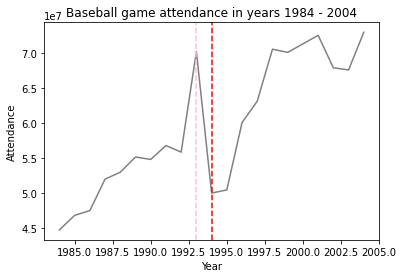

In [22]:
#8 the baseball strike
#in 1994, there was a baseball strike. Players and owners cancelled the season. Rumor has it that fan
#were angry and didn't go the ballpark for several years
#looking a trend from the attendance 10 years before and the strike, is this true?

att_year = df_fixed.groupby(["yearID"], as_index = False)["attendance"].sum()
year_att = att_year.loc[(att_year["yearID"] >= 1984) & (att_year["yearID"] <= 2004)]
year_att

x = year_att["yearID"]
y = year_att["attendance"]

plt.plot(x, y, c = "Grey")
plt.title("Baseball game attendance in years 1984 - 2004")
plt.xlabel("Year")
plt.ylabel("Attendance")
plt.axvline(1994, color = "Red", linestyle = "--")
plt.axvline(1993, color = "Pink", linestyle = "--")
plt.show()

#### A: Looking at the graph above, it seems that people didn't go to the ball park before 1994, in 1994 number of game goers reached the bottom and started to increase again ever since. 
It seems that something happened in 1993 rather than 1994 that severely discouraged the people from attending baseball games.

In [23]:
#9 (1/2)
#early vs modern era
#baseball has many different periods. Too simplify, there is the "old era" that runs until 1920. 
#After 1920 is considered the "modern era"

#analyze the two different periods.  are there any major statistical differnces? use three different 
#statistics to compare or contrast the two eras

df_old = df.loc[df["yearID"] <= 1920].groupby(["yearID"]).sum()

df_old.describe()

,Rank,G,Ghome,W,L,Win_percentage,Champ,R,AB,H,...,SF,RA,ER,ERA,CG,SV,E,DP,FP,attendance
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.0,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,5.000000e+01
mean,70.500000,1844.880000,481.700000,906.120000,906.920000,7.085424,0.440000,8835.980000,63196.020000,16395.040000,...,0.0,8835.920000,5845.760000,46.882000,1415.000000,57.920000,4858.120000,1251.400000,13.352580,2.776116e+06
std,27.680576,888.929387,597.467794,437.631176,436.520792,2.487289,0.501427,3834.591927,28730.032318,7232.500962,...,0.0,3834.591231,2860.697357,18.159449,640.689488,63.425946,2267.396769,628.086404,4.769153,2.739453e+06
min,21.000000,254.000000,0.000000,125.000000,125.000000,2.988319,0.000000,1904.000000,10822.000000,3101.000000,...,0.0,1904.000000,851.000000,13.830000,231.000000,1.000000,1778.000000,146.000000,5.304000,0.000000e+00
25%,71.000000,1249.000000,0.000000,618.500000,618.500000,5.994823,0.000000,6415.250000,45110.750000,11900.750000,...,0.0,6415.250000,4292.000000,39.375000,1130.000000,13.000000,3550.750000,865.500000,11.122500,0.000000e+00
50%,72.000000,2105.000000,0.000000,1026.000000,1026.000000,7.994677,0.000000,9346.500000,73799.000000,17987.000000,...,0.0,9346.500000,6679.000000,46.725000,1435.000000,33.000000,4451.000000,1374.500000,14.640500,2.399831e+06
75%,78.000000,2468.000000,1232.750000,1218.000000,1218.000000,7.999672,1.000000,10728.500000,81079.000000,20323.500000,...,0.0,10728.500000,7460.750000,53.907500,1909.750000,97.500000,5411.250000,1600.000000,15.334500,5.571223e+06
max,205.000000,3760.000000,1256.000000,1837.000000,1837.000000,15.465345,1.000000,19383.000000,122587.000000,31129.000000,...,0.0,19383.000000,12150.000000,105.300000,2885.000000,248.000000,14555.000000,2626.000000,29.281000,9.120875e+06


In [24]:
#9 (2/2)
df_new = df.loc[df["yearID"] > 1920].groupby(["yearID"]).sum()

df_new.describe()

,Rank,G,Ghome,W,L,Win_percentage,Champ,R,AB,H,...,SF,RA,ER,ERA,CG,SV,E,DP,FP,attendance
count,100.000000,100.000000,100.0000,100.000000,100.000000,100.000000,100.00,100.0000,100.00000,100.000000,...,100.000000,100.0000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,1.000000e+02
mean,84.430000,3506.660000,1753.2000,1749.390000,1749.390000,11.179120,0.99,15690.6800,119933.24000,31383.430000,...,625.460000,15690.6800,13991.650000,90.019700,711.230000,688.120000,2941.110000,3294.680000,21.873830,3.540966e+07
std,12.241885,1002.954587,501.2964,504.593964,504.593964,2.935240,0.10,4672.2358,34010.23188,8670.361621,...,630.480744,4672.2358,4524.373953,27.383249,390.452311,408.711013,455.765488,878.532522,5.833753,2.515271e+07
min,70.000000,1796.000000,898.0000,898.000000,898.000000,7.988623,0.00,8344.0000,64058.00000,14439.000000,...,0.000000,8344.0000,7638.000000,53.460000,29.000000,156.000000,1037.000000,1432.000000,15.464000,0.000000e+00
25%,72.000000,2474.000000,1237.0000,1230.000000,1230.000000,7.999979,1.00,11625.7500,85170.00000,23471.500000,...,0.000000,11625.7500,9974.750000,65.707500,286.250000,248.750000,2746.000000,2423.500000,15.577750,1.066391e+07
50%,84.000000,3251.000000,1625.5000,1619.500000,1619.500000,11.999617,1.00,14083.5000,110576.00000,29132.000000,...,615.500000,14083.5000,12425.500000,83.695000,789.500000,668.500000,2950.500000,3041.000000,23.441500,2.675632e+07
75%,91.000000,4296.500000,2148.2500,2146.000000,2146.000000,14.000067,1.00,19791.5000,146868.75000,38862.500000,...,1257.250000,19791.5000,17934.500000,117.350000,1064.500000,1120.000000,3285.250000,4095.750000,27.461750,5.763467e+07
max,110.000000,4864.000000,2431.0000,2431.000000,2431.000000,15.001045,1.00,24971.0000,167783.00000,45327.000000,...,1514.000000,24971.0000,22876.000000,142.870000,1273.000000,1292.000000,3710.000000,4711.000000,29.547000,7.948472e+07


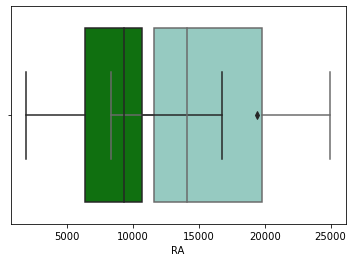

In [25]:
boxplot_n = sb.boxplot(x = df_new["RA"], color = "Green", palette = "Set3")
boxplot_o = sb.boxplot(x = df_old["RA"], color = "Green")

#data = df_fixed.groupby(["yearID"], as_index = False)["RA"].sum()
#x = data["yearID"]
#y = data["RA"]
#plt.plot(x, y, c = "Grey")

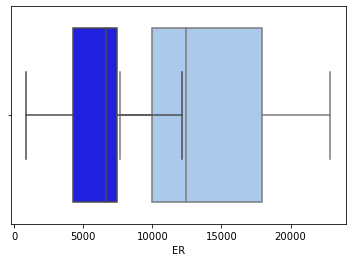

In [26]:
boxplot_n = sb.boxplot(x = df_new["ER"], color = "Blue", palette = "pastel")
boxplot_o = sb.boxplot(x = df_old["ER"], color = "Blue")

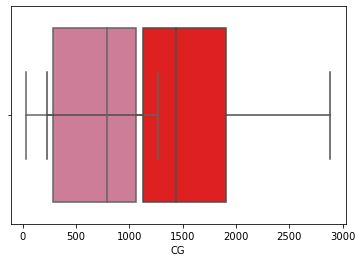

In [27]:
boxplot_n = sb.boxplot(x = df_new["CG"], color = "Palevioletred")
boxplot_o = sb.boxplot(x = df_old["CG"], color = "Red")

#### A: It seems that:
RA (Opponents runs scored) stats show certain level of betterment. Although a bit more dispersed for "modern era", mean value for that stat almost doubled and median value increased by 150%.

ER (Earned runs) show an interesting pattern. We see a significant betterment in the stat for the "modern era" relative to "old era". Maximum value for "old era" actually became a median value of "modern era". Data is again more dispersed, but we have double as many observations as for "old era". Minimum value for "modern era" is actually 75% percentile in "old era".

CG (Complete Games) data for "old era" is very dispersed, however it seems that "old era" has actually better statistics for completed games than "modern era". 

In [28]:
#10
#run the dataset (with all the changes) through logistical regression. use the binary "champ" 
#columns as the predictor variable 
from sklearn.linear_model import LogisticRegression

X = df_fixed.drop("Champ", axis = 1)
y = df_fixed["Champ"]

X, y

(      index  yearID lgID teamID franchID  Rank    G  Ghome     W   L  ...  \
 0        23    1873  NaN    BS1      BNA     1   60    NaN  43.0  16  ...   
 1        31    1874  NaN    BS1      BNA     1   71    NaN  52.0  18  ...   
 2        34    1874  NaN    NY2      NNA     2   65    NaN  42.0  23  ...   
 3        38    1875  NaN    BS1      BNA     1   82    NaN  71.0   8  ...   
 4        40    1875  NaN    HR1      HNA     3   86    NaN  54.0  28  ...   
 ...     ...     ...  ...    ...      ...   ...  ...    ...   ...  ..  ...   
 2846   2921    2019   AL    TBA      TBD     2  162   81.0  96.0  66  ...   
 2847   2922    2019   AL    TEX      TEX     3  162   81.0  78.0  84  ...   
 2848   2923    2019   AL    TOR      TOR     4  162   81.0  67.0  95  ...   
 2849   2924    2019   NL    WAS      WSN     2  162   81.0  93.0  69  ...   
 2850   2947    2020   NL    SDN      SDP     2   60   32.0  37.0  23  ...   
 
        ERA  CG  SV    E   DP     FP  attendance  teamIDBR  te

In [29]:
lr = LogisticRegression(max_iter = 1000)

X = X._get_numeric_data()
X.fillna(X.median(), inplace = True)
X, y

(      index  yearID  Rank    G  Ghome     W   L  Win_percentage    R    AB  \
 0        23    1873     1   60   81.0  43.0  16        0.728814  739  2748   
 1        31    1874     1   71   81.0  52.0  18        0.742857  735  3129   
 2        34    1874     2   65   81.0  42.0  23        0.646154  501  2730   
 3        38    1875     1   82   81.0  71.0   8        0.898734  831  3515   
 4        40    1875     3   86   81.0  54.0  28        0.658537  557  3356   
 ...     ...     ...   ...  ...    ...   ...  ..             ...  ...   ...   
 2846   2921    2019     2  162   81.0  96.0  66        0.592593  769  5628   
 2847   2922    2019     3  162   81.0  78.0  84        0.481481  810  5540   
 2848   2923    2019     4  162   81.0  67.0  95        0.413580  726  5493   
 2849   2924    2019     2  162   81.0  93.0  69        0.574074  873  5512   
 2850   2947    2020     2   60   32.0  37.0  23        0.616667  325  7000   
 
       ...   HBP   RA   ER   ERA  CG  SV    E   DP

In [30]:
lr.fit(X,y)

LogisticRegression(max_iter=1000)

In [31]:
lr.score(X,y)

0.9582602595580498